In [2]:
import sys
sys.path.append("../")

In [4]:
import pandas as pd
import os, config
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
files = os.listdir(config.MidiFiles.preprocessed_csv_files)

In [6]:
dfs = []

for file in files:
    df = pd.read_csv(config.MidiFiles.preprocessed_csv_files + '/' + file)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

In [7]:
combined_df.info()
combined_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083659 entries, 0 to 1083658
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   delta_time  1083659 non-null  int64 
 1   event       1083659 non-null  object
 2   channel     1083659 non-null  int64 
 3   pitch       1083659 non-null  int64 
 4   velocity    1083659 non-null  int64 
 5   duration    1083659 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 49.6+ MB


,delta_time,channel,pitch,velocity,duration
count,1.083659e+06,1.083659e+06,1.083659e+06,1.083659e+06,1.083659e+06
mean,9.098459e+01,2.882551e+00,6.368601e+01,9.705948e+01,2.568585e+02
std,1.372776e+02,3.788387e+00,1.145300e+01,3.247418e+01,3.252803e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.500000e+01,6.700000e+01,9.600000e+01
50%,7.000000e+01,1.000000e+00,6.400000e+01,1.060000e+02,1.540000e+02
75%,1.430000e+02,5.000000e+00,7.200000e+01,1.270000e+02,2.940000e+02
max,9.120000e+03,1.500000e+01,1.080000e+02,1.270000e+02,4.902200e+04


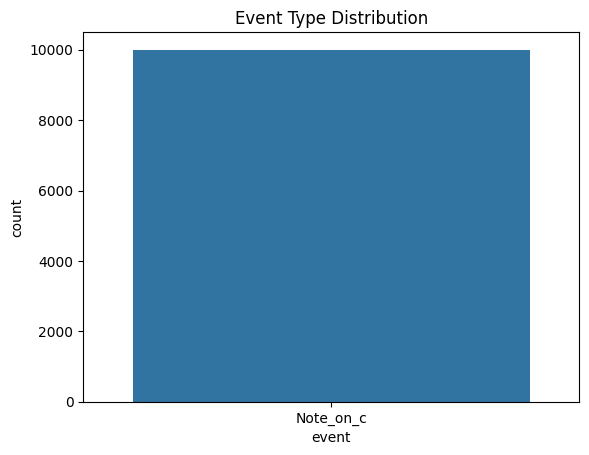

In [8]:
sns.countplot(data=combined_df.sample(10_000), x='event')
plt.title("Event Type Distribution")
plt.show()

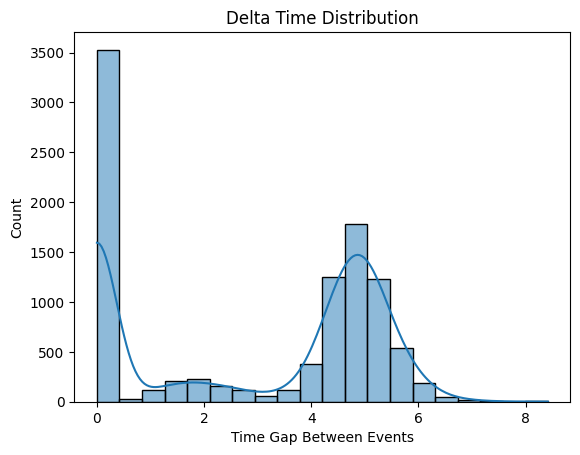

In [ ]:
import numpy as np
sns.histplot(np.log1p(combined_df['delta_time'].sample(10_000)), bins=20, kde=True)
plt.title("Delta Time Distribution")
plt.xlabel("Time Gap Between Events")
plt.show()

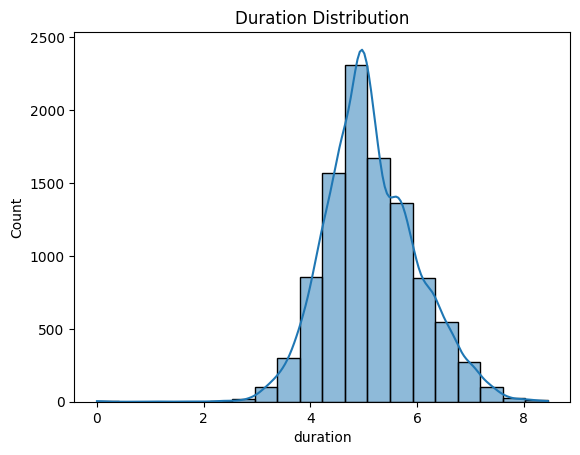

In [13]:
import numpy as np
sns.histplot(np.log1p(combined_df['duration'].sample(10_000)), bins=20, kde=True)
plt.title("Duration Distribution")
plt.show()

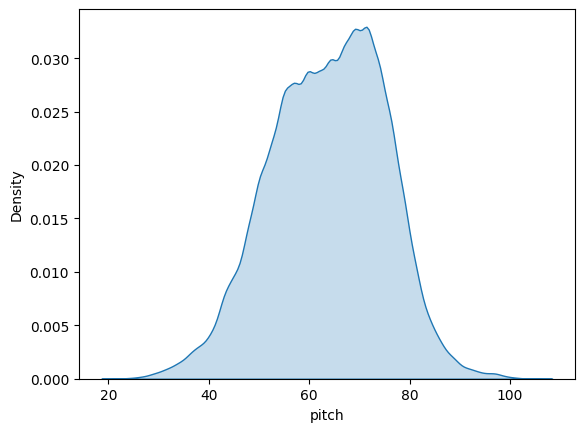

In [10]:
notes = combined_df['pitch'].sample(100_000)

sns.kdeplot(data=notes, fill=True)
plt.show()